In [1]:
# basics
import numpy as np
import pandas as pd
import datetime
import re
import os,glob
import pickle
import textwrap

# statistics
import statsmodels.api as sm
import statsmodels.formula.api as smf


# plotting
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = [15,12]

# own data wrappers
from imp import reload
import measureclass as mc; reload(mc);
import coronadataclass as cdc; reload(cdc);
import crossvalidationclass as cvc; reload(cvc);

np.seterr(divide = 'ignore');


In [2]:
crossval_rt_removeEurope     = cvc.CrossValidation(RemoveContinent = 'Europe',     ExternalObservableFile = 'COVID19_data_PAPER_VERSION.csv', resolve_US_states = True, FinalDateFromDB = True, FinalDateExtendWithShiftdays = True)
crossval_rt_removeAsia       = cvc.CrossValidation(RemoveContinent = 'Asia',       ExternalObservableFile = 'COVID19_data_PAPER_VERSION.csv', resolve_US_states = True, FinalDateFromDB = True, FinalDateExtendWithShiftdays = True)
crossval_rt_removeAmericas   = cvc.CrossValidation(RemoveContinent = 'Americas',   ExternalObservableFile = 'COVID19_data_PAPER_VERSION.csv', resolve_US_states = True, FinalDateFromDB = True, FinalDateExtendWithShiftdays = True)
crossval_rt_DateDistribution = cvc.CrossValidation(DateRandomize = 'Distribution', ExternalObservableFile = 'COVID19_data_PAPER_VERSION.csv', resolve_US_states = True, FinalDateFromDB = True, FinalDateExtendWithShiftdays = True)
crossval_rt_DateRandom       = cvc.CrossValidation(DateRandomize = 'Random',       ExternalObservableFile = 'COVID19_data_PAPER_VERSION.csv', resolve_US_states = True, FinalDateFromDB = True, FinalDateExtendWithShiftdays = True)



In [ ]:
shiftdaylist = np.arange(10) * 2
alphalist = np.power(10, np.linspace(-4, -1, num = 7))
crossvalcount = 10

crossval_rt_removeEurope.RunCV    (shiftdaylist = shiftdaylist, alphalist = alphalist, crossvalcount = crossvalcount)
crossval_rt_removeAsia.RunCV      (shiftdaylist = shiftdaylist, alphalist = alphalist, crossvalcount = crossvalcount)
crossval_rt_removeAmericas.RunCV  (shiftdaylist = shiftdaylist, alphalist = alphalist, crossvalcount = crossvalcount)
crossval_rt_DateDistribution.RunCV(shiftdaylist = shiftdaylist, alphalist = alphalist, crossvalcount = crossvalcount)
crossval_rt_DateRandom.RunCV      (shiftdaylist = shiftdaylist, alphalist = alphalist, crossvalcount = crossvalcount)


In [4]:
crossval_rt_DateDistribution = pickle.load(open('pickle/cv_datedistr_200601.pickle','rb'))
crossval_rt_DateRandom       = pickle.load(open('pickle/cv_daterandom_200601.pickle','rb'))

crossval_rt_removeAmericas   = pickle.load(open('pickle/cv_rAmer_200601.pickle','rb'))
crossval_rt_removeEurope     = pickle.load(open('pickle/cv_rEuro_200601.pickle','rb'))
crossval_rt_removeAsia       = pickle.load(open('pickle/cv_rAsia_200601.pickle','rb'))


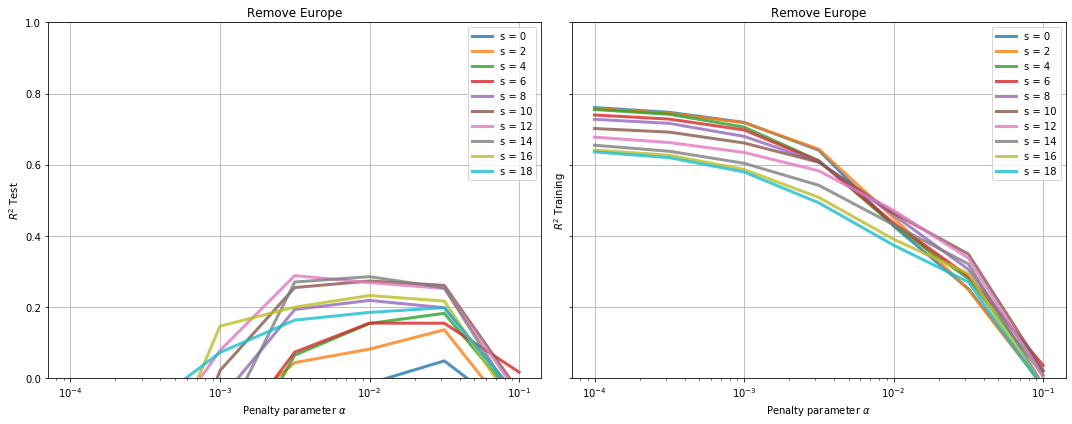

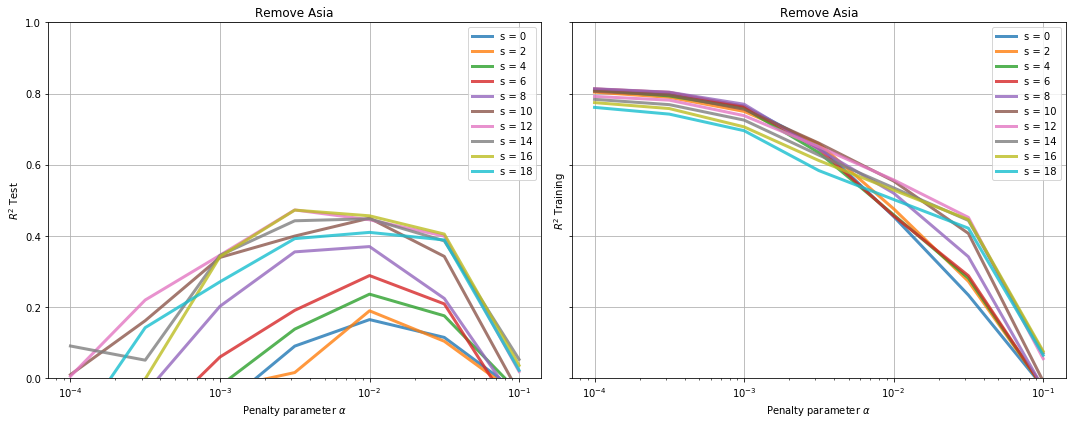

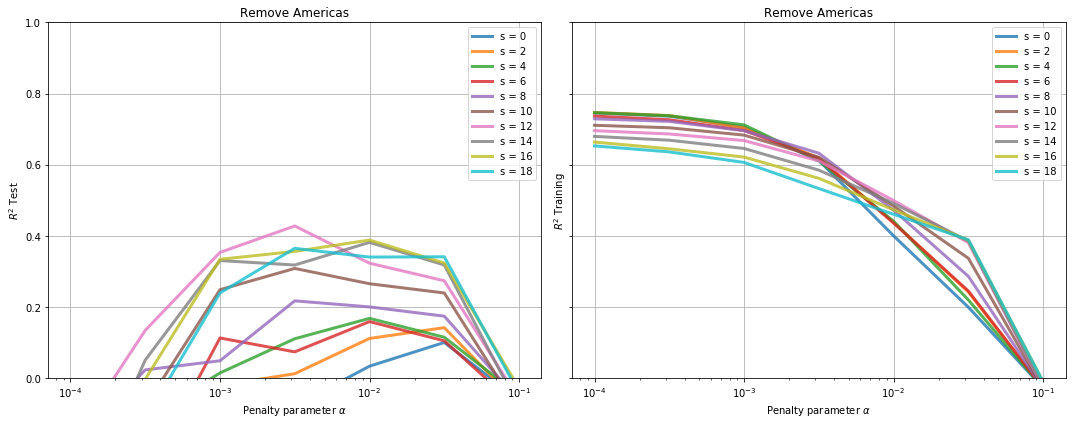

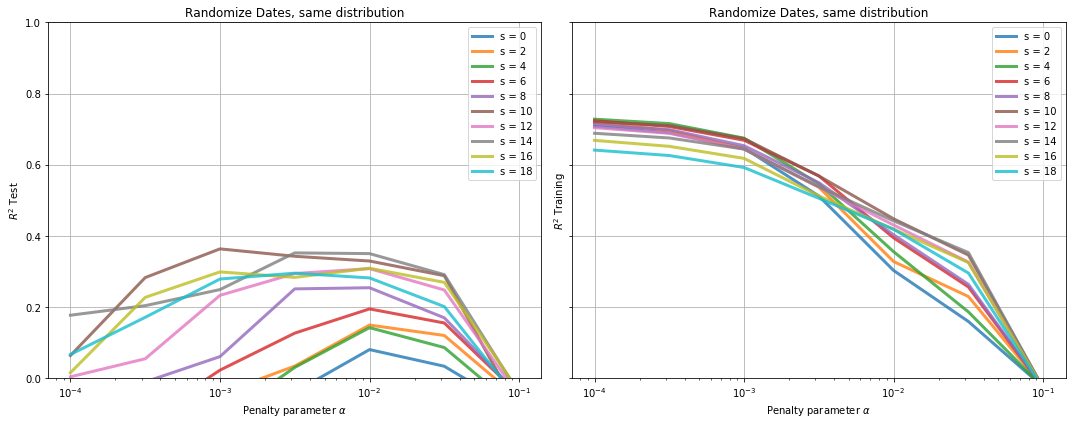

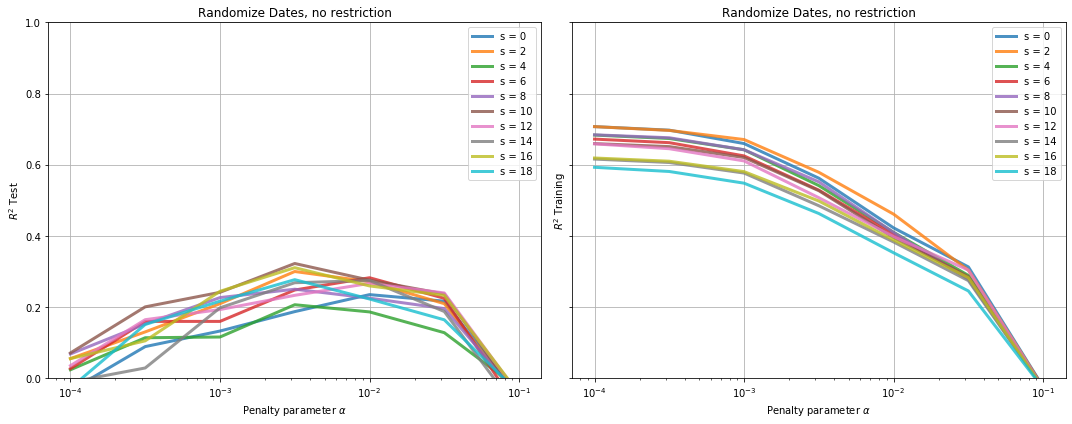

In [5]:
crossval_rt_removeEurope.PlotCVresults(title = 'Remove Europe')
crossval_rt_removeAsia.PlotCVresults(title = 'Remove Asia')
crossval_rt_removeAmericas.PlotCVresults(title = 'Remove Americas')
crossval_rt_DateDistribution.PlotCVresults(title = 'Randomize Dates, same distribution')
crossval_rt_DateRandom.PlotCVresults(title = 'Randomize Dates, no restriction')


In [ ]:
pickle.dump(crossval_rt_DateDistribution,open('pickle/cv_datedistr_200601.pickle','wb'))
pickle.dump(crossval_rt_DateRandom,open('pickle/cv_daterandom_200601.pickle','wb'))
pickle.dump(crossval_rt_removeAmericas,open('pickle/cv_rAmer_200601.pickle','wb'))
pickle.dump(crossval_rt_removeEurope,open('pickle/cv_rEuro_200601.pickle','wb'))
pickle.dump(crossval_rt_removeAsia,open('pickle/cv_rAsia_200601.pickle','wb'))


In [6]:
print('Remove Americas')
print(crossval_rt_removeAmericas.ProcessCVresults()[['shiftdays','alpha','R2 Test Weighted', 'R2 Test Avgd']].sort_values('R2 Test Weighted', ascending = False).head(10))
print('Remove Europe')
print(crossval_rt_removeEurope.ProcessCVresults()[['shiftdays','alpha','R2 Test Weighted', 'R2 Test Avgd']].sort_values('R2 Test Weighted', ascending = False).head(10))
print('Remove Asia')
print(crossval_rt_removeAsia.ProcessCVresults()[['shiftdays','alpha','R2 Test Weighted', 'R2 Test Avgd']].sort_values('R2 Test Weighted', ascending = False).head(10))
print('Date Distribution')
print(crossval_rt_DateDistribution.ProcessCVresults()[['shiftdays','alpha','R2 Test Weighted', 'R2 Test Avgd']].sort_values('R2 Test Weighted', ascending = False).head(10))
print('Date Random')
print(crossval_rt_DateRandom.ProcessCVresults()[['shiftdays','alpha','R2 Test Weighted', 'R2 Test Avgd']].sort_values('R2 Test Weighted', ascending = False).head(10))


Remove Americas
    shiftdays     alpha  R2 Test Weighted  R2 Test Avgd
47         12  0.003162          0.427508      0.432072
57         16  0.010000          0.387876      0.392876
50         14  0.010000          0.381362      0.316600
68         18  0.003162          0.364672      0.360403
61         16  0.003162          0.355998      0.283432
44         12  0.001000          0.353175      0.321723
67         18  0.031623          0.340938      0.366569
64         18  0.010000          0.340012      0.307946
58         16  0.001000          0.333765      0.318452
51         14  0.001000          0.330274      0.323061
Remove Europe
    shiftdays     alpha  R2 Test Weighted  R2 Test Avgd
47         12  0.003162          0.287980      0.213900
50         14  0.010000          0.285039      0.274476
36         10  0.010000          0.272819      0.259159
54         14  0.003162          0.269850      0.246790
43         12  0.010000          0.268333      0.230324
39         10  0.0

In [7]:
# use parameters from full model

crossval_rt_removeAmericas.ComputeFinalModels(modelparameters=[(13,10**-2.1)])
crossval_rt_removeAsia.ComputeFinalModels(modelparameters=[(13,10**-2.1)])
crossval_rt_removeEurope.ComputeFinalModels(modelparameters=[(13,10**-2.1)])

#crossval_rt_DateDistribution.ComputeFinalModels(modelparameters=[(10,10**-3)])
#crossval_rt_DateRandom.ComputeFinalModels(modelparameters=[(10,10**-2.5)])


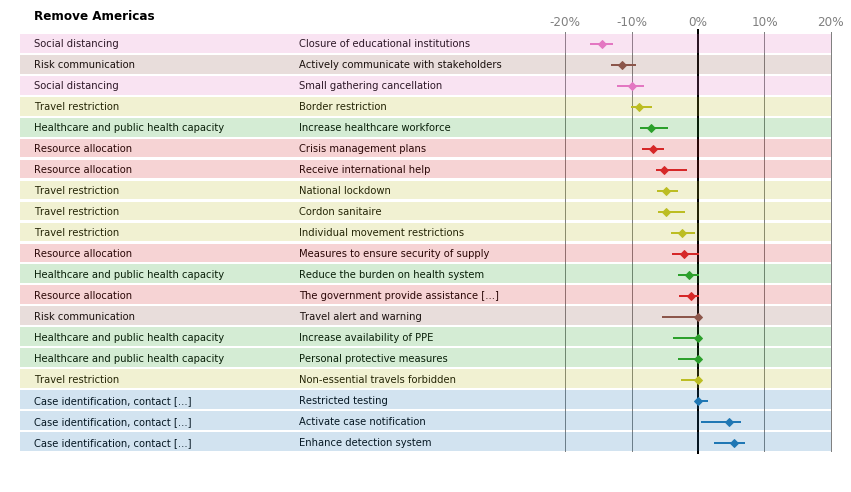

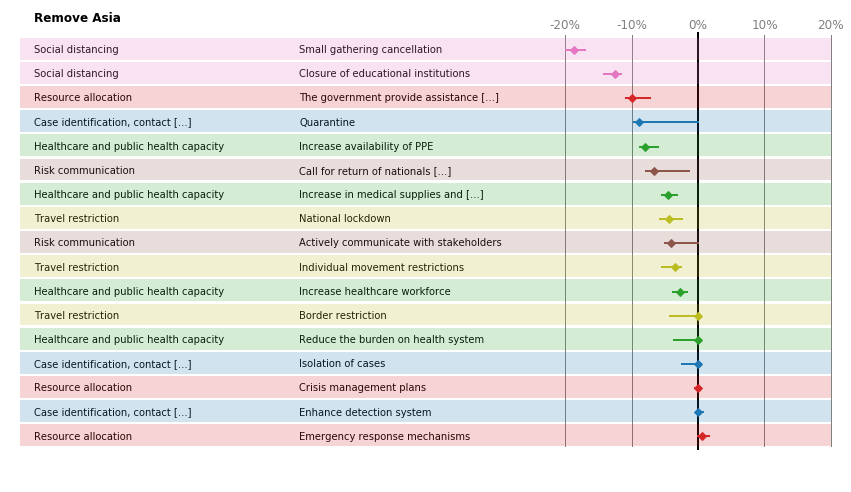

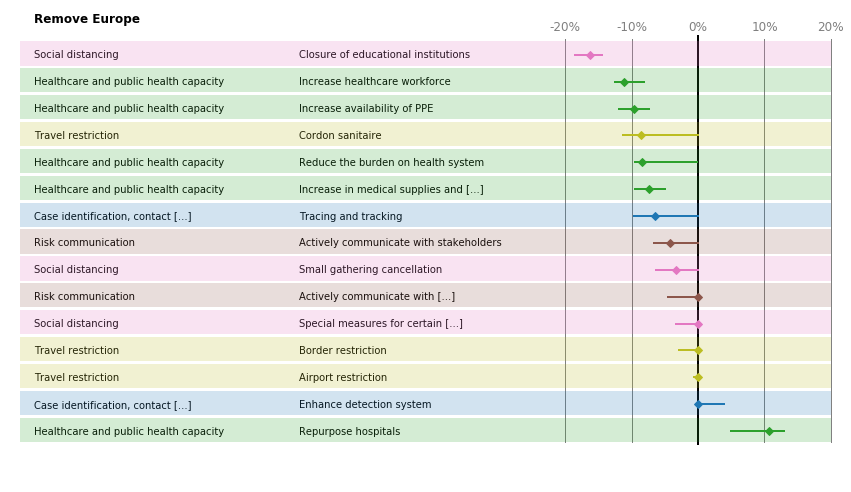

In [9]:
crossval_rt_removeAmericas.PlotMeasureListSorted(drop_zeros = True, figsize = (15,8), title = 'Remove Americas', graylines = [-20,-10,10,20], entryheight = 1)
crossval_rt_removeAsia.PlotMeasureListSorted    (drop_zeros = True, figsize = (15,8), title = 'Remove Asia',     graylines = [-20,-10,10,20], entryheight = 1)
crossval_rt_removeEurope.PlotMeasureListSorted  (drop_zeros = True, figsize = (15,8), title = 'Remove Europe',   graylines = [-20,-10,10,20], entryheight = 1)

#crossval_rt_DateDistribution.PlotMeasureListSorted(drop_zeros=True,figsize = (15,8),title = 'Date Distribution',graylines=[-20,-10,10,20])
#crossval_rt_DateRandom.PlotMeasureListSorted(drop_zeros=True,figsize = (15,8),title = 'Date Random',graylines=[-20,-10,10,20])


In [21]:
combined_data = crossval_rt_removeAmericas.FinalMeasureEffects(drop_zeros=True).merge(crossval_rt_removeAsia.FinalMeasureEffects(drop_zeros=True), left_on = ['Measure_L1', 'Measure_L2'], right_on = ['Measure_L1', 'Measure_L2'], how = 'outer').merge(crossval_rt_removeEurope.FinalMeasureEffects(drop_zeros=True), left_on = ['Measure_L1', 'Measure_L2'],right_on = ['Measure_L1', 'Measure_L2'], how = 'outer').fillna(0)

combined_data.columns = ['Measure_L1', 'Measure_L2', 'median_rAmer', 'low_rAmer', 'high_rAmer', 'median_rAsia', 'low_rAsia', 'high_rAsia', 'median_rEuro', 'low_rEuro', 'high_rEuro']
combined_data['sum_median'] = combined_data['median_rAmer'] + combined_data['median_rAsia'] + combined_data['median_rEuro']
combined_data['sum_low']    = combined_data['low_rAmer'] + combined_data['low_rAsia'] + combined_data['low_rEuro']
combined_data['sum_high']   = combined_data['high_rAmer'] + combined_data['high_rAsia'] + combined_data['high_rEuro']
combined_data.sort_values(by = ['sum_median', 'sum_low', 'sum_high'], inplace = True)

combined_data.reset_index(drop=True,inplace = True)

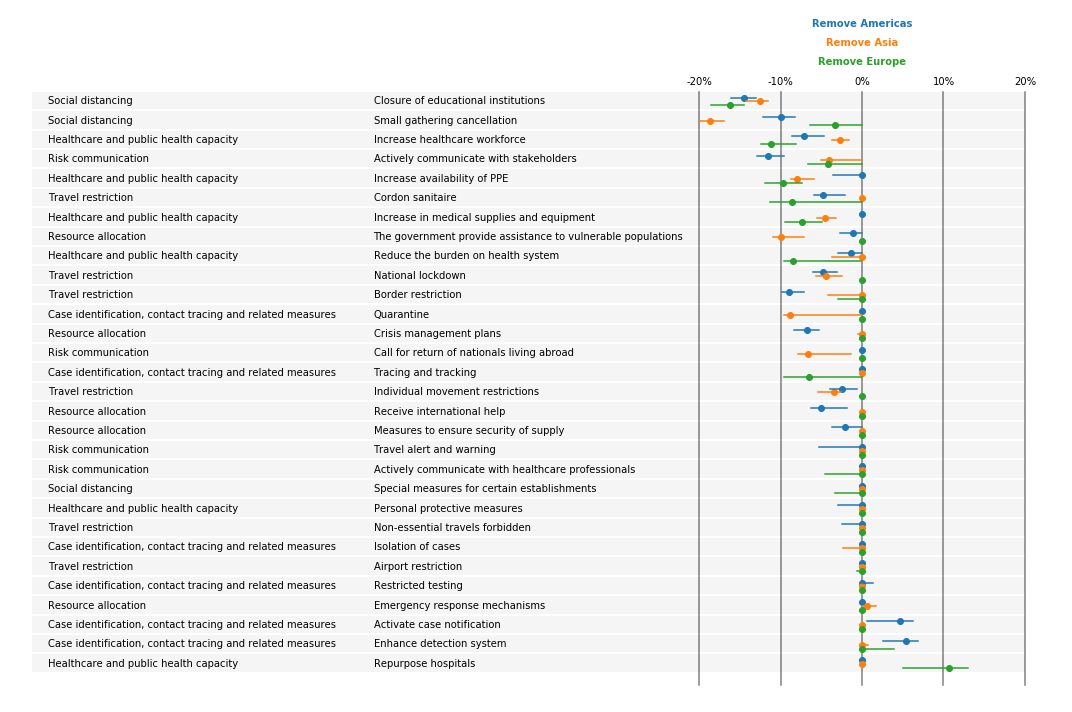

In [64]:
fig,ax = plt.subplots(1,1,figsize = (15,10))
for index,values in combined_data.iterrows():
    ax.annotate(values['Measure_L1'],(-100,-index))
    ax.annotate(values['Measure_L2'],(-60,-index))
    ax.scatter([values['median_rAmer']*100],[-index+.3], c = 'TAB:BLUE')
    ax.scatter([values['median_rAsia']*100],[-index+.1], c = 'TAB:ORANGE')
    ax.scatter([values['median_rEuro']*100],[-index-.1], c = 'TAB:GREEN')
    ax.plot([100*values['low_rAmer'],100*values['high_rAmer']],[-index+.3,-index+.3], c = 'TAB:BLUE')
    ax.plot([100*values['low_rAsia'],100*values['high_rAsia']],[-index+.1,-index+.1], c = 'TAB:ORANGE')
    ax.plot([100*values['low_rEuro'],100*values['high_rEuro']],[-index-.1,-index-.1], c = 'TAB:GREEN')
    background = plt.Rectangle([-102, -index - .3], 102+20, 0.9, fill = True, fc = '#ededed', alpha = 0.5, zorder = -1)
    ax.add_patch(background)
ax.set_xlim([-105,25])
ax.set_ylim([-len(combined_data)-1,5])
ax.plot([-20,-20],[.6,-len(combined_data)],c = 'black',zorder = 0,alpha=.5)
ax.plot([-10,-10],[.6,-len(combined_data)],c = 'black',zorder = 0,alpha=.5)
ax.plot([0,0],[.6,-len(combined_data)],c = 'black',zorder = 0,alpha=.5)
ax.plot([10,10],[.6,-len(combined_data)],c = 'black',zorder = 0,alpha=.5)
ax.plot([20,20],[.6,-len(combined_data)],c = 'black',zorder = 0,alpha=.5)

ax.annotate('Remove Americas', [0,4], c = 'TAB:BLUE',   weight = 'bold', ha = 'center')
ax.annotate('Remove Asia',     [0,3], c = 'TAB:ORANGE', weight = 'bold', ha = 'center')
ax.annotate('Remove Europe',   [0,2], c = 'TAB:GREEN',  weight = 'bold', ha = 'center')
ax.annotate('-20%',[-20,1],ha = 'center')
ax.annotate('-10%',[-10,1],ha = 'center')
ax.annotate('0%',[0,1],ha = 'center')
ax.annotate('10%',[10,1],ha = 'center')
ax.annotate('20%',[20,1],ha = 'center')
ax.axis('off')
fig.tight_layout()
fig.savefig('comparison_remove.pdf')

In [60]:
crossval_rt_removeAmericas.FinalMeasureEffects(additional_columns = ['mean','std'], rescale = False).sort_values(by = ['Measure_L1','Measure_L2']).to_csv('measure_effects_removeAmer_200609.csv',index = False, header = False)
crossval_rt_removeAsia.FinalMeasureEffects    (additional_columns = ['mean','std'], rescale = False).sort_values(by = ['Measure_L1','Measure_L2']).to_csv('measure_effects_removeAsia_200609.csv',index = False, header = False)
crossval_rt_removeEurope.FinalMeasureEffects  (additional_columns = ['mean','std'], rescale = False).sort_values(by = ['Measure_L1','Measure_L2']).to_csv('measure_effects_removeEuro_200609.csv',index = False, header = False)